# Heart Disease Problem

**This mini project is an attempt to build a machine learning model that can predict whether a patient has any heart disease or not, based on various medical attributes.**

**Steps involved:**
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinical parameters about a patient, can we predict whether a patient has heart disease or not. It is a binary classification problem where 1 = patient has a heart disease, 0 = the patient has no heart disease

## 2. Create data dictionary

The original data came from the Cleavland data, UCI Machine Learning Repository. Link: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

It is also available on Kaggle. Link: https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci

## 3. Evaluation

> If we can reach 95% accuracy in predicting whether or not a patient has a heart disease during the proof of concept, we'll pursue the project

## 4. Features

**14 attributes used:**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
  * 0: Typical angina: chest pain related decrease blood supply to the heart
  * 1: Atypical angina: chest pain not related to heart
  * 2: Non-anginal pain: typically esophageal spasms (non heart related)
  * 3: Asymptomatic: chest pain not showing signs of disease
    trestbps - resting blood pressure (in mm Hg on admission to the           hospital) anything above 130-140 is typically cause for concern
4. chol - serum cholestoral in mg/dl
5. serum = LDL + HDL + .2 * triglycerides
   above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
  * 0: Nothing to note
  * 1: ST-T Wave abnormality can range from mild symptoms to severe problems, signals non-normal heart beat
  * 2: Possible or definite left ventricular hypertrophy, Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
  * 0: Upsloping: better heart rate with excercise (uncommon)
  * 1: Flatsloping: minimal change (typical healthy heart)
  * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
  * colored vessel means the doctor can see the blood passing through
  * the more blood movement the better (no clots)
13. thal - thalium stress result
  * 1,3: normal
  * 6: fixed defect: used to be defect but ok now
  * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

Pandas, Matplotlib, NumPy and Scikit-Learn

In [1]:
#Import all the tools you need

#Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#We want our plots to appear inside the notebook
%matplotlib inline 

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Loading the data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape #(rows, columns)

(303, 14)

## Data Exploration (EDA)

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
#How many entries of each class are present
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

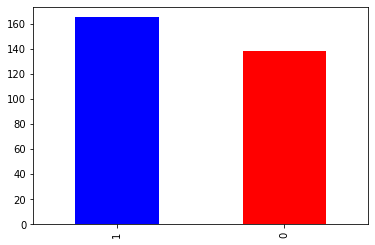

In [10]:
#Plotting the classes
df["target"].value_counts().plot(kind="bar", color=["blue", "red"]);

In [11]:
df.info() #Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
#Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Heart disease frequency according to sex

In [14]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
#Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


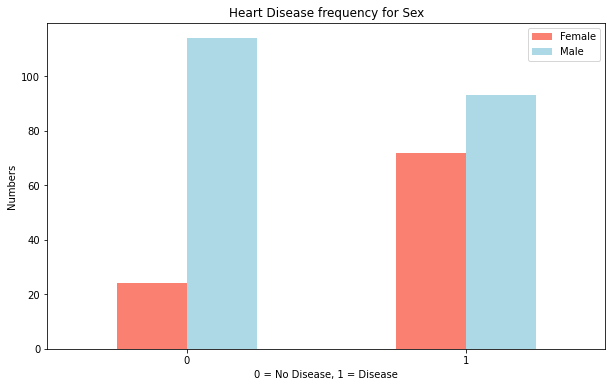

In [19]:
#create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]);
plt.title("Heart Disease frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Numbers")
plt.legend(["Female", "Male"]);
plt.xticks(rotation = 0);

#### Heart disease frequency according to thalach and age

In [20]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

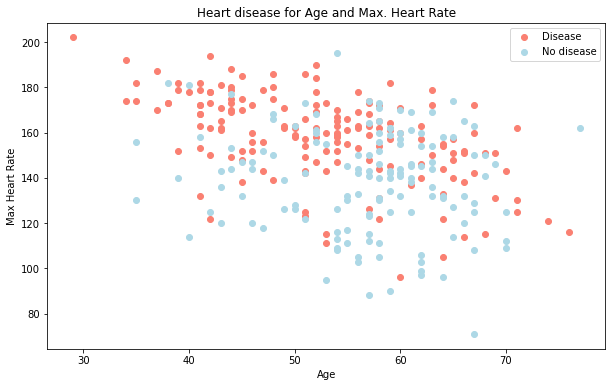

In [23]:
#Create another figure
plt.figure(figsize=(10, 6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c = "salmon");

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c = "lightblue");

#Add some info
plt.title("Heart disease for Age and Max. Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No disease"]);

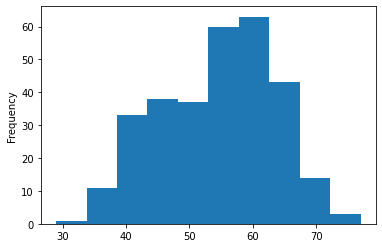

In [24]:
#Check the distribution of the age column with a histogram
df.age.plot.hist();

In [25]:
#As we can see, for our given dataset - most of the entries have age 
#between 50 to 60, while for age 30 and >70 the entries are less

#### Heart disease frequency for chest pain type

* Value 0: typical angina
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: asymptomatic

In [26]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


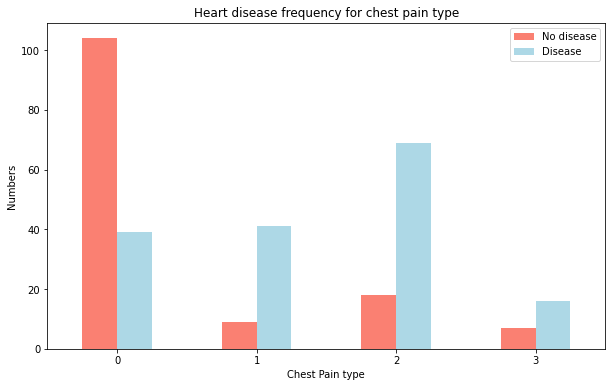

In [27]:
# Plotting the graph
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"])

#Add some communication
plt.title("Heart disease frequency for chest pain type")
plt.xlabel("Chest Pain type")
plt.ylabel("Numbers")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0);

In [28]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


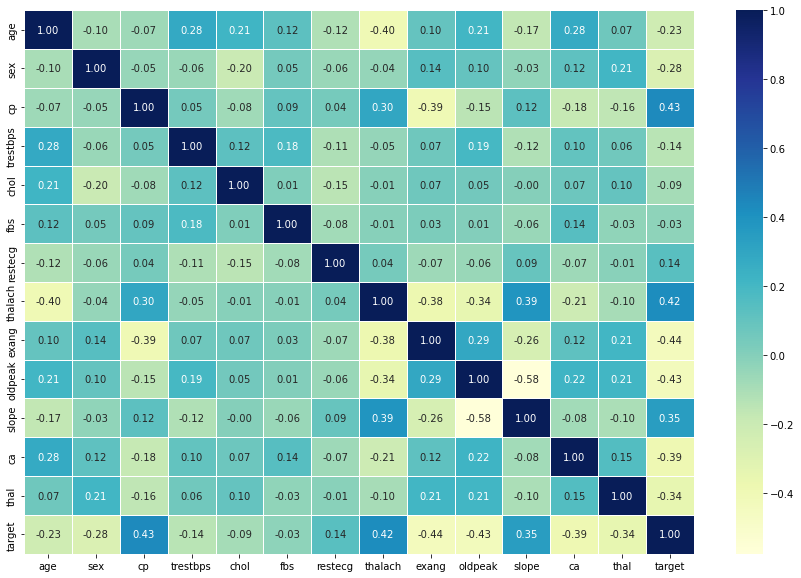

In [29]:
# Plotting it using heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [30]:
#Diagonal = correlation 1 (eg, age column is perfectly correlated 
#to age column)
#A higher positive value indicates a higher positive correlation
#(eg, as cp value goes up, the target of 1 also goes up[See fig.])
#A higher negative value indicates a higher negative correlation
#(eg, as exang value goes down, the target of 1 goes down)

## 5. Modelling

In [3]:
#Split the data into X and y labels
X = df.drop("target", axis = 1)
y = df["target"]

In [32]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [33]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [4]:
#Split the data into train and test sets
np.random.seed(43)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3


In [36]:
y_train

17     1
36     1
94     1
210    0
268    0
      ..
145    1
16     1
58     1
277    0
255    0
Name: target, Length: 242, dtype: int64

**We are going to try three different models -**
1. Logistic regression
2. K-Nearest Neighbors
3. RandomForestClassifier

In [5]:
#Put the models in a dictionary
models = {"Logistic regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random forest": RandomForestClassifier()}

In [6]:
#Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    """
    Fits the data and evaluates the models
    models: a dictionary of different SKLearn ML models
    X_train: training data(no labels)
    X_test: testing data(no labels)
    y_train: training labels
    y_test: testing labels
    """
    #Set random seed
    np.random.seed(43)
    #Make a dict to keep the model scores
    model_scores = {}
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [7]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test)

model_scores

D:\VIT\Courses\ML\Projects\Heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic regression': 0.8852459016393442,
 'KNN': 0.6557377049180327,
 'Random forest': 0.8852459016393442}

#### Model Comparison

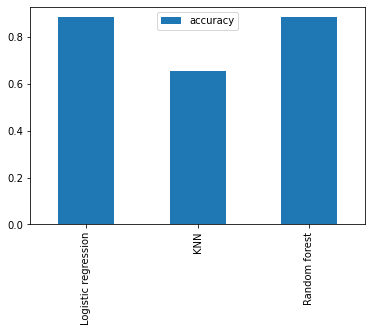

In [42]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

# 6. Experimentation

**We will see and experiment on -**
1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 score
8. Classification Report
9. ROC Curve
10. Area under the curve (AUC)

**i. Hyperparameter tuning by hand**

In [8]:
#Tuning KNN
train_scores = []
test_scores = []

#Create a list of different values for neighbors
neighbors = range(1, 21)
#Setup KNN instance
knn = KNeighborsClassifier()
#Loop through the models of different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [48]:
train_scores

[1.0,
 0.7644628099173554,
 0.7851239669421488,
 0.756198347107438,
 0.7396694214876033,
 0.7148760330578512,
 0.7148760330578512,
 0.7066115702479339,
 0.7066115702479339,
 0.7231404958677686,
 0.7148760330578512,
 0.7148760330578512,
 0.7272727272727273,
 0.7148760330578512,
 0.6818181818181818,
 0.6942148760330579,
 0.7066115702479339,
 0.7066115702479339,
 0.71900826446281,
 0.7148760330578512]

In [49]:
test_scores

[0.6721311475409836,
 0.5409836065573771,
 0.6557377049180327,
 0.5901639344262295,
 0.6557377049180327,
 0.639344262295082,
 0.5901639344262295,
 0.639344262295082,
 0.6557377049180327,
 0.5737704918032787,
 0.6229508196721312,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.6065573770491803,
 0.6721311475409836,
 0.6721311475409836,
 0.639344262295082]

Max. KNN score on the test data: 72.13%


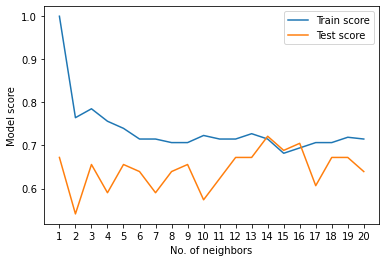

In [51]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21))
plt.xlabel("No. of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Max. KNN score on the test data: {max(test_scores)*100:.2f}%")

**ii. Hyperparameter tuning with RandomizedSearchCV**

**We will tune:**
* Logistic Regression
* RandomForestClassifier

In [9]:
#Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [10]:
#Tuning with RandomizedSearchCV

np.random.seed(43)

#Setup random hyperparameter search for logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
#Fit the model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [11]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [12]:
rs_log_reg.score(X_test, y_test) 

0.9016393442622951

In [21]:
#We can see that the model improved by 2%

In [13]:
#Now, let's try the RandomForest tuning
np.random.seed(43)

#Setup the random hyperparameter search for randomforestclassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                          verbose=True)

#Fit the model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [14]:
rs_rf.best_params_

{'n_estimators': 360,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 5}

In [15]:
rs_rf.score(X_test, y_test)

0.8852459016393442

In [31]:
model_scores

{'Logistic regression': 0.8852459016393442,
 'KNN': 0.6557377049180327,
 'Random forest': 0.8852459016393442}

**iii. Hyperparameter tuning with GridSearchCV**

In [32]:
#Since our LogisticRegression Model improved, we will experiment on that 

In [16]:
#Different hyperparameters for our model
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}

#Setup grid hyperparameter search for the model
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv=5,
                          verbose=True)

#Fit the model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [17]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [18]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### Evaluating our tuned ML Classifier

In [19]:
#Make predictions with tuned model
y_preds = rs_log_reg.predict(X_test)

#Here, we have used rs_log_reg as it gave the best results ~ 90%

In [37]:
y_preds

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [38]:
y_test

242    0
130    1
208    0
160    1
124    1
      ..
176    0
65     1
11     1
67     1
185    0
Name: target, Length: 61, dtype: int64

D:\VIT\Courses\ML\Projects\Heart-disease-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


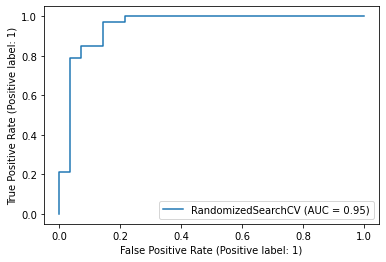

In [39]:
#Plot ROC Curve and calculate AUC metric
plot_roc_curve(rs_log_reg, X_test, y_test);

In [40]:
#Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[22  6]
 [ 0 33]]


In [41]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a confusion matrix using seaborn
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Actual labels")
    plt.ylabel("Predicted labels")
    

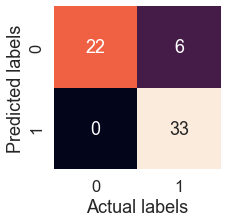

In [42]:
plot_conf_mat(y_test, y_preds)

In [43]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        28
           1       0.85      1.00      0.92        33

    accuracy                           0.90        61
   macro avg       0.92      0.89      0.90        61
weighted avg       0.92      0.90      0.90        61



In [44]:
#As there is no class imbalance(see 'support' - almost similar values)
#we can use weighted avg
#Else, look for macro avg

**Calculate evaluation metrics using cross validation**

In [45]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [46]:
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [47]:
#Cross-validated accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
#See the mean score
np.mean(cv_acc)

0.8479781420765027

In [48]:
#Cross-validated precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
#See the mean score
np.mean(cv_precision)

0.8215873015873015

In [49]:
#Cross-validated recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
#See the mean score
np.mean(cv_recall)

0.9272727272727274

In [50]:
#Cross-validated recall
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
#See the mean score
np.mean(cv_f1)

0.8705403543192143

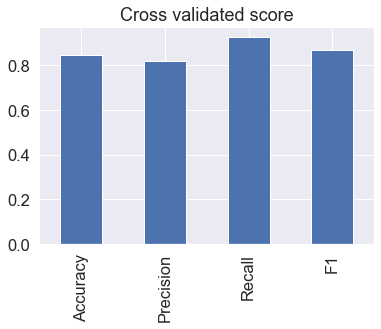

In [52]:
#Plot the different metrics
cv_metrics = pd.DataFrame({"Accuracy":np.mean(cv_acc),
                           "Precision":np.mean(cv_precision),
                           "Recall":np.mean(cv_recall),
                           "F1":np.mean(cv_f1)},
                           index=[0])

cv_metrics.T.plot.bar(title="Cross validated score", legend=False);

### Feature Importance

**Which fearture contributed the most to the outcome?**

In [21]:
#Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

**Earlier when we found out the correlation, it was only a general one which could be derived from the dataset. But now, we will look at the feature importance and find out how each feature variable is correlated to the target** 

In [22]:
clf.coef_

array([[ 6.84568348e-03, -7.23345105e-01,  7.27626283e-01,
        -1.37546303e-02, -3.56823694e-04,  1.51693168e-02,
         3.05349885e-01,  2.19714837e-02, -5.38587825e-01,
        -4.68959873e-01,  4.62311795e-01, -5.54937509e-01,
        -6.57949145e-01]])

In [23]:
#Match coef of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.006845683481743502,
 'sex': -0.7233451048615291,
 'cp': 0.7276262833903925,
 'trestbps': -0.013754630342947742,
 'chol': -0.00035682369382957017,
 'fbs': 0.015169316806651583,
 'restecg': 0.30534988528240525,
 'thalach': 0.021971483699805363,
 'exang': -0.5385878245308399,
 'oldpeak': -0.468959872845434,
 'slope': 0.46231179489339924,
 'ca': -0.554937508897641,
 'thal': -0.6579491454763224}

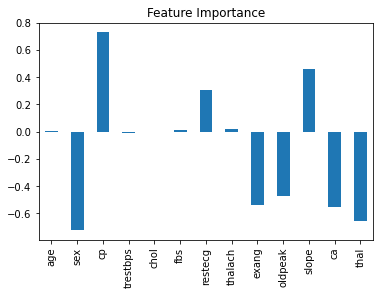

In [24]:
#Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [25]:
#Verify the above for sex
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [27]:
#Verify the above for slope
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## Conclusion

After experimenting through the various models, the highest accuracy that we could obtain was 90.16% with the help of Logistic Regression. But still it didn't reach the accuracy of 95%. Thus, the possible solutions can be -
* Collecting more data
* Trying other models
* Again experimenting on the current models